In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

# rainfall

In [3]:
rainfall_data = pd.read_csv('data/climate_big_data.csv')

rainfall_data.columns

rainfall_data = rainfall_data.drop(columns=['ELEVATION (m)', 'STATION PRESSURE (0.1 mb)', 'STATION PRESSURE SOURCE FLAG', 'MEAN SEA LEVEL PRESSURE (0.1 mb)',
                                               'MEAN SEA LEVEL PRESSURE SOURCE FLAG', 'MEAN SEA LEVEL PRESSURE HEIGHT FLAG', 'VAPOR PRESSURE (0.1 mb)',
                                               'VAPOR PRESSURE SOURCE FLAG', 'VAPOR PRESSURE DEPARTURE (0.1 mb)', 'VAPOR PRESSURE DEPARTURE SOURCE FLAG',
                                               ])

rainfall_data.columns

rainfall_data = rainfall_data[rainfall_data['STATION NAME'].notnull()]

rainfall_data = rainfall_data.drop(columns=['MINIMUM TEMPERATURE (deg C)', 'MINIMUM TEMPERATURE SOURCE FLAG',
       'MEAN TEMPERATURE (deg C)', 'MEAN TEMPERATURE SOURCE FLAG',
       'MEAN TEMPERATURE DEPARTURE (deg C)',
       'MEAN TEMPERATURE DEPARTURE SOURCE FLAG', 'MAXIMUM TEMPERATURE (deg C)',
       'MAXIMUM TEMPERATURE SOURCE FLAG', 'NO. DAYS PRECIPITATION >= 1.0 mm',
       'NO. DAYS OF PRECIPITATION >= 1.0 mm SOURCE FLAG',])

rainfall_data.columns

rainfall_data = rainfall_data.drop(columns =['TOTAL PRECIPITATION SOURCE FLAG',
       'TOTAL PRECIPITATION DEPARTURE (mm)',
       'TOTAL PRECIPITATION DEPARTURE SOURCE FLAG', 'PRECIPITATION QUINTILE',
       'PRECIPITATION QUINTILE SOURCE FLAG', 'SUNSHINE DURATION (hours)',
       'SUNSHINE DURATION SOURCE FLAG',
       'SUNSHINE DURATION AS LONG TERM NORMAL (%)',
       'SUNSHINE DURATION AS LONG TERM NORMAL SOURCE FLAG', 'VERSION',])

C:\Users\thcho\.conda\envs\dl_env\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (9,13,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
maiami = rainfall_data[rainfall_data['LATITUDE (deg)']>25.69239]

maiami = maiami[maiami['LATITUDE (deg)']<32.00752]

maiami = maiami[maiami['LONGITUDE (deg)']<-80.16042]

maiami = maiami[maiami['LONGITUDE (deg)']>-82.0667]

maiami = maiami.drop(611601) # 결측치

new_maiami = maiami.groupby(by = ['YEAR-MONTH'],as_index=False).mean()

In [5]:
west_usa = rainfall_data[rainfall_data['LATITUDE (deg)']>33.99996]

west_usa = west_usa[west_usa['LATITUDE (deg)']<47.62433]

west_usa = west_usa[west_usa['LONGITUDE (deg)']<-87.52265]

west_usa = west_usa[west_usa['LONGITUDE (deg)']>-122.32958]

west_usa = west_usa.drop(west_usa[west_usa['TOTAL PRECIPITATION (mm)'] <0].index) #결측치 제거

new_west_usa = west_usa.groupby(by = ['YEAR-MONTH'], as_index=False).mean()


In [6]:
east_usa = rainfall_data[rainfall_data['LATITUDE (deg)']>33.99996]

east_usa = east_usa[east_usa['LATITUDE (deg)']<41.91139]

east_usa = east_usa[east_usa['LONGITUDE (deg)']<-71.17411]

east_usa = east_usa[east_usa['LONGITUDE (deg)']>-87.52264]

east_usa = east_usa.drop(east_usa[east_usa['TOTAL PRECIPITATION (mm)']<0]['TOTAL PRECIPITATION (mm)'].index) # 결측치 제거

new_east_usa = east_usa.groupby(by=['YEAR-MONTH'],as_index=False).mean()


In [6]:
year = new_east_usa['YEAR-MONTH']
box = []
for index in range (len(year)) : 
    box.append(year[index])
year = box

In [7]:
def findfunc(db, data):
    found = db[db['YEAR-MONTH']==(str(data))]['TOTAL PRECIPITATION (mm)'][db[db['YEAR-MONTH']==(str(data))]['TOTAL PRECIPITATION (mm)'].index[0]]
    return_data = round(found, 4)
    return return_data

### 겨울용 (12, 01, 02) 평균 데이터

In [10]:
def wint_findfunc(db, year):
    return_list = []
    month = ['12', '01', '02']
    for y in year :
        
        date_list= []
        data_sum=0
        for m in month :
            if m == '12':
                date = str(y) + '-' + m
                data_sum += findfunc(db,date)
            else : 
                date = str(y+1) +'-' +m
                data_sum += findfunc(db,date)
        return_list.append(round(data_sum/3,4))
    return return_list


Text(0.5, 1.0, 'Compare')

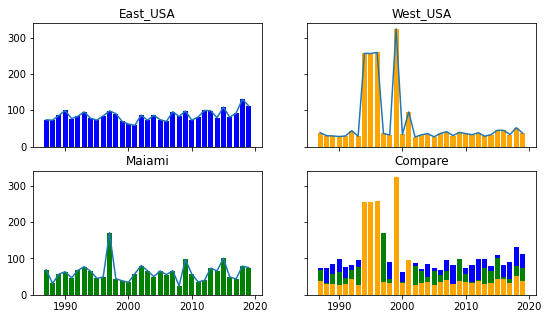

In [11]:
x_year = [x for x in range (1987,2020)]
win_east_usa = wint_findfunc(new_east_usa, x_year)
win_west_usa = wint_findfunc(new_west_usa, x_year)
win_maiami = wint_findfunc(new_maiami, x_year)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize =(9,5), sharex=True , sharey=True)

ax = axs[0][0]
ax.bar(x_year,win_east_usa, color='blue')
ax.plot(x_year,win_east_usa)
ax.set_title('East_USA')

ax = axs[0][1]
ax.bar(x_year, win_west_usa, color='orange')
ax.plot(x_year, win_west_usa)
ax.set_title('West_USA')

ax = axs[1][0]
ax.bar(x_year, win_maiami, color='green')
ax.plot(x_year, win_maiami)
ax.set_title('Maiami')

ax = axs[1][1]
ax.bar(x_year,win_east_usa, color = 'blue')
ax.bar(x_year, win_maiami, color = 'green')
ax.bar(x_year, win_west_usa, color = 'orange')

ax.set_title('Compare')

### 여름용 (06,07,08)

In [14]:
def summ_findfunc(db, year):
    return_list = []
    month = ['06', '07', '08']
    for y in year :
        date_list= []
        data_sum=0
        for m in month :
            date = str(y) + '-' + m
            data_sum += findfunc(db,date)
        return_list.append(round(data_sum/3,4))
    return return_list

In [15]:
x_s_year = [x for x in range(1987,2021)]

Text(0.5, 1.0, 'Compare')

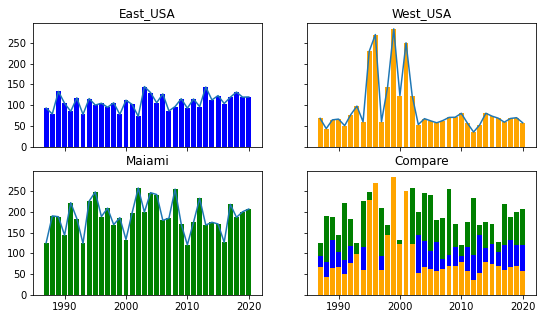

In [16]:
summ_east_usa = summ_findfunc(new_east_usa, x_s_year)
summ_west_usa = summ_findfunc(new_west_usa, x_s_year)
summ_maiami= summ_findfunc(new_maiami, x_s_year)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize =(9,5), sharex=True , sharey=True)

ax = axs[0][0]
ax.bar(x_s_year,summ_east_usa, color='blue')
ax.plot(x_s_year,summ_east_usa)
ax.set_title('East_USA')

ax = axs[0][1]
ax.bar(x_s_year, summ_west_usa, color='orange')
ax.plot(x_s_year, summ_west_usa)
ax.set_title('West_USA')

ax = axs[1][0]
ax.bar(x_s_year, summ_maiami,color='green')
ax.plot(x_s_year, summ_maiami)
ax.set_title('Maiami')

ax = axs[1][1]
ax.bar(x_s_year, summ_maiami,color='green')
ax.bar(x_s_year,summ_east_usa,color='blue')
ax.bar(x_s_year, summ_west_usa, color='orange')

ax.set_title('Compare')

<BarContainer object of 126 artists>

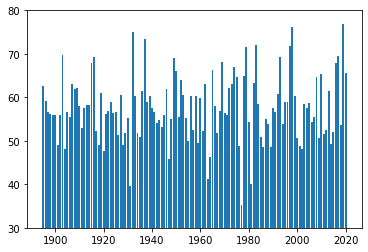

In [12]:
new_month = pd.read_csv('data/precipitation_USA_monthly.csv', header=3)
new_month['Value'] = new_month['Value']*25.4

def new_findfunc(db, data,position,want_find):
    found = db[db[position]==((data))][want_find][db[db[position]==((data))][want_find].index[0]]
    return_data = round(found, 4)
    return return_data


def find_wint(db, data,position,want_find) :
    return_list = [62.61]
    res_count = 0
    sum_data = 0
    for count in range (2,len(data)) : 
        month = 0
        compare_month = (1,2,12)
        month = db[position][count] - int(db[position][count]/100)*100 
        if month in compare_month :
            sum_data += new_findfunc(db,db[position][count],position, want_find)
            res_count += 1 
        if res_count == 3 :
            return_list.append(round((sum_data / 3),2))
            res_count = 0
            sum_data = 0
    return return_list
        

x_plot= [x for x in range (1895, 2021)]
len(x_plot)
plt.ylim(30,80)
plt.bar(x_plot, find_wint(new_month, new_month['Date'], 'Date', 'Value'))

Text(0.5, 1.0, 'Compare')

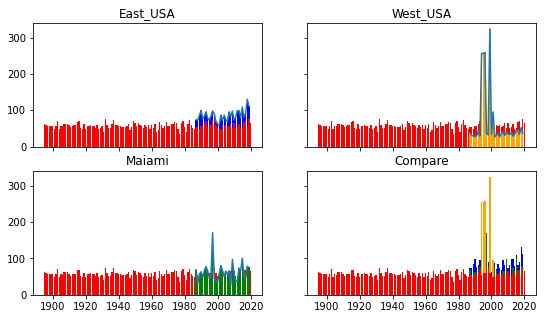

In [25]:
x_year = [x for x in range (1987,2020)]
win_east_usa = wint_findfunc(new_east_usa, x_year)
win_west_usa = wint_findfunc(new_west_usa, x_year)
win_maiami = wint_findfunc(new_maiami, x_year)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize =(9,5), sharex=True , sharey=True)

ax = axs[0][0]
ax.bar(x_year,win_east_usa, color='blue')
ax.bar(x_plot, find_wint(new_month, new_month['Date'], 'Date', 'Value'), color='red')
ax.plot(x_year,win_east_usa)
ax.set_title('East_USA')

ax = axs[0][1]
ax.bar(x_plot, find_wint(new_month, new_month['Date'], 'Date', 'Value'), color='red')
ax.bar(x_year, win_west_usa, color='orange')
ax.plot(x_year, win_west_usa)
ax.set_title('West_USA')

ax = axs[1][0]
ax.bar(x_plot, find_wint(new_month, new_month['Date'], 'Date', 'Value'), color='red')
ax.bar(x_year, win_maiami, color='green')
ax.plot(x_year, win_maiami)
ax.set_title('Maiami')

ax = axs[1][1]
ax.bar(x_year,win_east_usa, color = 'blue')
ax.bar(x_year, win_maiami, color = 'green')
ax.bar(x_year, win_west_usa, color = 'orange')
ax.bar(x_plot, find_wint(new_month, new_month['Date'], 'Date', 'Value'), color='red')

ax.set_title('Compare')

In [19]:
len(x_year)

33